# Survival Statistics from the Titanic

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read titanic3.csv into a dataframe using pandas
# titanic3.csv obtained from http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets

titanicData = pd.read_csv('titanic3.csv')
titanicData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Print column names
print titanicData.columns

Index([u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body',
       u'home.dest'],
      dtype='object')


# Survival rates by Class

In [4]:
survived_by_class = titanicData['survived'].groupby(titanicData['pclass'])

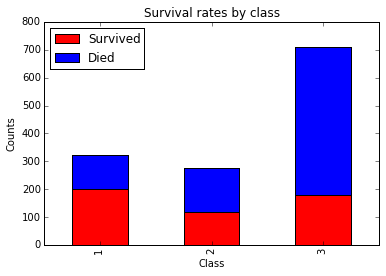

In [5]:
# Make stacked bar chart with number survived and number died per class

#number of passengers that survived and died by class
nSurvived = survived_by_class.sum()
nDied = survived_by_class.count() - nSurvived
nTotal = survived_by_class.count()
pSurvived = nSurvived/nTotal

pltsurvived = nSurvived.plot(kind = 'bar', color = 'r', label = 'Survived')
pltdied = nDied.plot(kind = 'bar', color = 'b', bottom= nSurvived, label = 'Died')
plt.ylabel('Counts')
plt.xlabel('Class')
plt.legend(loc = 'best')
plt.title('Survival rates by class')

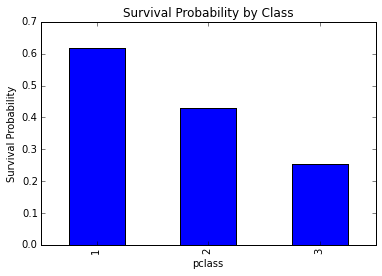

In [6]:
# Bar chart with probability of survival by class

plt_pSurvived = pSurvived.plot(kind = 'bar')
plt_pSurvived.set_ylabel('Survival Probability')
plt_pSurvived.set_title('Survival Probability by Class')

# Survival Rates by Gender

In [7]:
survived_by_gender = titanicData['survived'].groupby(titanicData['sex'])

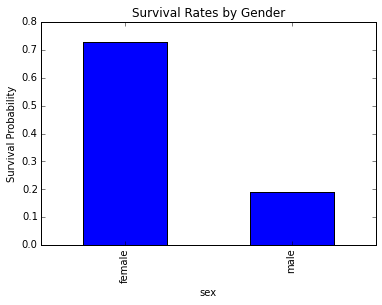

In [8]:
prob_survival_by_gender = survived_by_gender.sum()/survived_by_gender.count()
prob_survival_by_gender.plot(kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Rates by Gender')

# Survival by Gender and Class

In [9]:
gender_class_pivtable = titanicData.pivot_table(values=["survived"], index=["sex","pclass"], aggfunc=np.mean)
print gender_class_pivtable

               survived
sex    pclass          
female 1       0.965278
       2       0.886792
       3       0.490741
male   1       0.340782
       2       0.146199
       3       0.152130


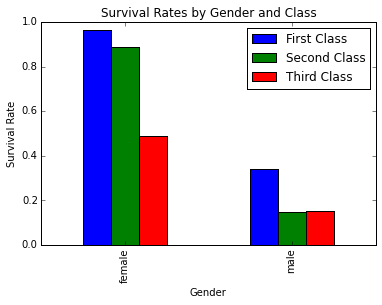

In [10]:
gc = gender_class_pivtable.unstack(level=-1)
sex_class_plot = gc.plot(kind='bar',stacked=False,title="Survival Rates by Gender and Class")
sex_class_plot.set_ylabel('Survival Rate')
sex_class_plot.set_xlabel('Gender')
sex_class_plot.legend(['First Class', 'Second Class', 'Third Class'])

Clearly, it was better to be a woman on the Titanic.

# Survival Rates by Age

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64


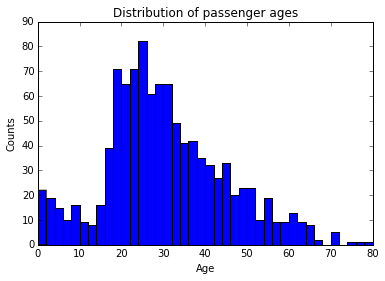

In [11]:
# Descriptive statistics about the ages of the passengers on board, and
# Histogram of ages of passengers
print titanicData.age.describe()
plt.hist(titanicData.age, bins = 40, range = (0,80))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Distribution of passenger ages')

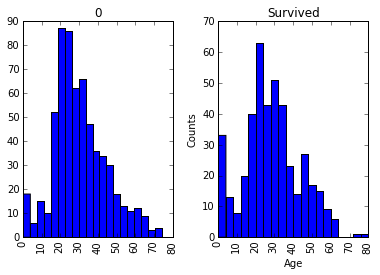

In [12]:
titanicData.hist(column='age',by='survived',bins=20, sharex = True)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title("Survived")
# Having trouble labeling the first subplot, which is the histogram of ages for people who died

In [13]:
# Average ages of those who survived and died
survived_by_age = titanicData['age'].groupby(titanicData['survived'])
print survived_by_age.aggregate(np.mean)

# We can see below that the average age of those who survived was 28.9 yrs, compared to 30.5 for those who died.

survived
0    30.545363
1    28.918244
Name: age, dtype: float64


In [14]:
age_bins = [0,10,20,30,40,50,60,70,80]
binned_ages = pd.cut(titanicData['age'],age_bins)
#pd.value_counts(binned_ages, sort=False)

In [15]:
age_class_pivtable = titanicData.pivot_table(values=["survived"], index=[binned_ages,"pclass"], aggfunc=np.mean)
t= age_class_pivtable.unstack(level=-1)
print t

          survived                    
pclass           1         2         3
age                                   
(0, 10]   0.750000  1.000000  0.416667
(10, 20]  0.818182  0.515152  0.271028
(20, 30]  0.698413  0.386139  0.258883
(30, 40]  0.712121  0.400000  0.224719
(40, 50]  0.538462  0.400000  0.135135
(50, 60]  0.651163  0.142857  0.000000
(60, 70]  0.235294  0.166667  0.250000
(70, 80]  0.500000       NaN  0.000000


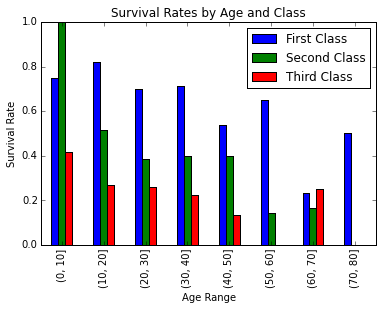

In [16]:
age_class_plot = t.plot(kind='bar',stacked=False,title="Survival Rates by Age and Class")
age_class_plot.set_ylabel('Survival Rate')
age_class_plot.set_xlabel('Age Range')
age_class_plot.legend(['First Class', 'Second Class', 'Third Class'])

# Names

In [8]:
# make all names lower case
def lower(x):
    return x.lower()

print titanicData['name'].apply(lower).head()

0                      allen, miss. elisabeth walton
1                     allison, master. hudson trevor
2                       allison, miss. helen loraine
3               allison, mr. hudson joshua creighton
4    allison, mrs. hudson j c (bessie waldo daniels)
Name: name, dtype: object


In [32]:
survival_by_name = titanicData['survived'].groupby(titanicData['name'].apply(lower).str.get(0))
sbn_sum = list(survival_by_name.sum())
sbn_count = list(survival_by_name.count())
sbn_ratio = list(survival_by_name.sum()/survival_by_name.count())

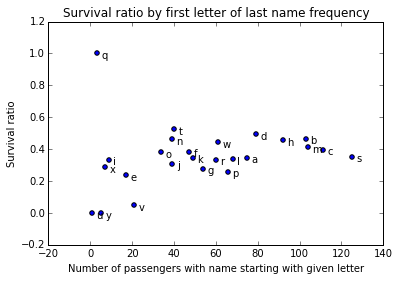

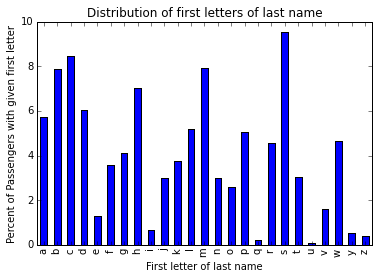

In [20]:
name_distribution = (survival_by_name.count()/sum(survival_by_name.count()))*100
name_distribution.plot(kind = 'bar')
plt.ylabel('Percent of Passengers with given first letter')
plt.xlabel('First letter of last name')
plt.title('Distribution of first letters of last name')

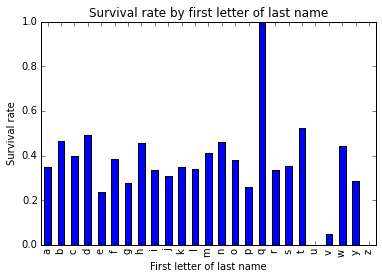

In [21]:
name_pivtable = titanicData.pivot_table(values=["survived"], index=titanicData['name'].apply(lower).str.get(0))
name_pivtable.plot(kind = 'bar', legend = False)
plt.xlabel('First letter of last name')
plt.ylabel('Survival rate')
plt.title('Survival rate by first letter of last name')

# it appears that, except for Q, first letter of last name is relatively uncorrelated with survival.

[-2, 140, -0.1, 1.1]

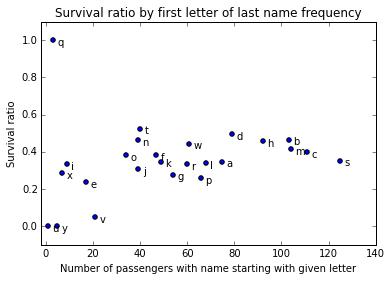

In [34]:
# Same data, but with survival rate and name frequency in the same plot

letters = map(chr, range(97, 123))
plt.scatter(sbn_count, sbn_ratio)
for letter, name_count, probability in zip(letters, sbn_count, sbn_ratio):
    plt.annotate(letter,
                xy = (name_count, probability),
                xytext = (5, -5),
                textcoords = 'offset points')
plt.title("Survival ratio by first letter of last name frequency")
plt.xlabel("Number of passengers with name starting with given letter")
plt.ylabel("Survival ratio")
plt.axis([-2,140, -0.1,1.1])

# Family Relationships

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64

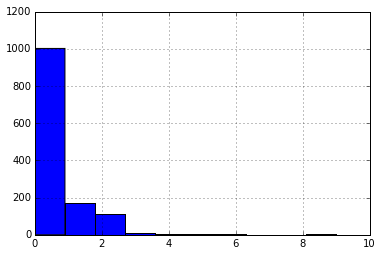

In [29]:
# Distribution of people with parents/children aboard
titanicData['parch'].hist()
titanicData.parch.describe()
# most people had no parents/children on board

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b558850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b75af10>], dtype=object)

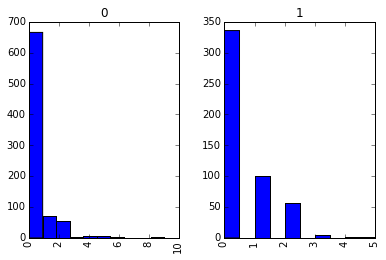

In [30]:
titanicData['parch'].hist(by=titanicData['survived'])

In [38]:
# Did those with parents/children aboard disproportionately survive?

parch_pivtable = titanicData.pivot_table(values=["survived"], index=titanicData['parch'])
print parch_pivtable

       survived
parch          
0      0.335329
1      0.588235
2      0.504425
3      0.625000
4      0.166667
5      0.166667
6      0.000000
9      0.000000


It seems that those with small families on board (parch value = 1-3) were more likely to survive than those with no relations, but those with larger families were less likely to survive.